Packages

In [1]:
from os import listdir
import matplotlib.pyplot as plt
from imutils import paths
import cv2
import numpy as np
import os
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

Data preparation

In [2]:
# Look at data folder structure
classes_dir = listdir("data/Kather_texture_2016_image_tiles_5000")
classes_dir

['.DS_Store',
 '01_TUMOR',
 '02_STROMA',
 '03_COMPLEX',
 '04_LYMPHO',
 '05_DEBRIS',
 '06_MUCOSA',
 '07_ADIPOSE',
 '08_EMPTY']

In [46]:
# Check files
files = listdir("data/Kather_texture_2016_image_tiles_5000/01_TUMOR")
for n in range(5):
    print(files[n])

10009_CRC-Prim-HE-03_009.tif_Row_301_Col_151.tif
10062_CRC-Prim-HE-02_003b.tif_Row_1_Col_301.tif
100B0_CRC-Prim-HE-09_009.tif_Row_1_Col_301.tif
10104_CRC-Prim-HE-10_021.tif_Row_451_Col_1.tif
10142_CRC-Prim-HE-09_025.tif_Row_151_Col_151.tif


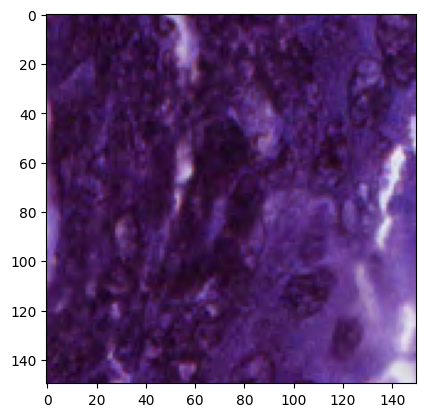

In [47]:
# visualize example image
file = cv2.imread("data/Kather_texture_2016_image_tiles_5000/01_TUMOR/1A11_CRC-Prim-HE-07_022.tif_Row_601_Col_151.tif")
# file = cv2.cvtColor(file, cv2.COLOR_BGR2RGB)
# file = cv2.resize(file, (128, 128))
plt.imshow(file)

In [48]:
# Load data
print("[INFO] loading images...")
imagePaths = list(paths.list_images("data/Kather_texture_2016_image_tiles_5000"))
data = []
labels = []
# loop over the image paths
for imagePath in imagePaths:
    # extract the class label from the filename
    label = (imagePath.split(os.path.sep)[-2][1])
    # Since we are going to use MobileNetV2 we need to resize the images
    # to the expected size by the pre-trained network.
    image = load_img(imagePath, target_size=(150, 150))
    image = img_to_array(image)
    # image = preprocess_input(image)
    image = image / 255
    data.append(image)
    labels.append(label)


[INFO] loading images...


In [21]:
data[0].shape

(150, 150, 3)

In [22]:
print(labels[10], labels[2500], labels[4500])

1 5 8


In [12]:
data[0]

array([[[0.3254902 , 0.10980392, 0.33333334],
        [0.39607844, 0.13333334, 0.3372549 ],
        [0.39607844, 0.13333334, 0.3372549 ],
        ...,
        [0.30980393, 0.09019608, 0.26666668],
        [0.2901961 , 0.07058824, 0.24705882],
        [0.23921569, 0.07450981, 0.23137255]],

       [[0.2901961 , 0.11764706, 0.30980393],
        [0.35686275, 0.12941177, 0.32156864],
        [0.34901962, 0.12156863, 0.3137255 ],
        ...,
        [0.3764706 , 0.13333334, 0.31764707],
        [0.32156864, 0.07843138, 0.2627451 ],
        [0.22745098, 0.0627451 , 0.21960784]],

       [[0.27450982, 0.13725491, 0.29411766],
        [0.2901961 , 0.1254902 , 0.28235295],
        [0.27450982, 0.10980392, 0.26666668],
        ...,
        [0.4509804 , 0.18431373, 0.3764706 ],
        [0.38039216, 0.11372549, 0.30588236],
        [0.25490198, 0.07843138, 0.23921569]],

       ...,

       [[0.2627451 , 0.08235294, 0.22745098],
        [0.23137255, 0.08235294, 0.21568628],
        [0.22352941, 0

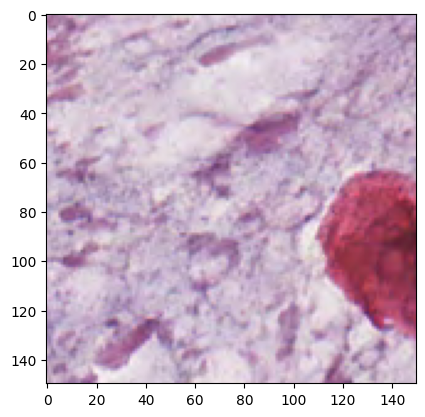

In [23]:
plt.imshow(data[2500])

In [49]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
print(labels[0])

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [15]:
print(type(labels[0]))

<class 'numpy.ndarray'>


In [50]:
# Reshape the labels array into a 2d
nsamples, nx, ny = labels.shape
labels = labels.reshape((nsamples,nx*ny))

In [51]:
# index list
index = [x for x in range(0, len(labels))]
print(len(index), index[-1])

5000 4999


In [52]:
# Split of data into train and test
(trainX, testX, trainY, testY, train_index, test_index) = train_test_split(data, labels, index, test_size=0.20, stratify=labels, random_state=42)

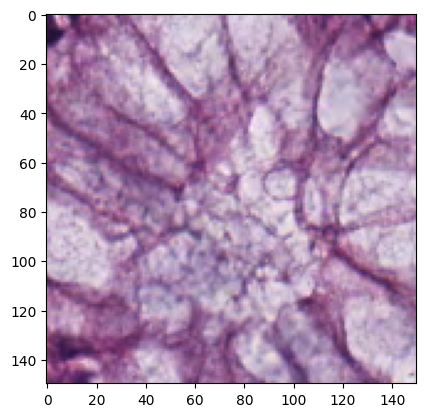

In [53]:
plt.imshow(trainX[1983])

In [55]:
print(trainY[1983])

[1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0.]


In [56]:
train_index[1983]

3746

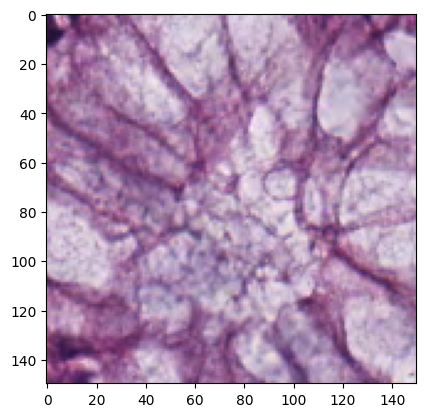

In [57]:
plt.imshow(data[3746])

In [60]:
print(labels[3746],"\n", labels[3746] == trainY[1983])

[1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0.] 
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
